# Project Geminae MidPoint Model
## Gradient Boosted Regression Model for 3 and 6 month projections

Tom Gregg

2024-02-25

## Setting Up The Model

In [1]:
# Import Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
from datetime import datetime

In [106]:
# Importing Libraries and Packages to perform Boosted Tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

In [3]:
# Max Display 
pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Importing and Preparing Data

In [4]:
# Creating our file path for the CSV
file_path = 'https://raw.githubusercontent.com/tbgregg000/Capstone/main/Cleaned_GenericWellData.csv'
df = pd.read_csv(file_path).copy()

In [5]:
df.head(10)

,Well Index,InitialProductionDate,DrillingStartDate,DrillingCompletionDate,TrueVerticalDepth_FT,MeasuredDepth_FT,InitialProductionYear,UpperPerforation_FT,LowerPerforation_FT,PerforationInterval_FT,LateralLength_FT,FractureStages,AvgStageSpacing_FT,ProppantLoad_LBSPerGAL,ProppantIntensity_LBSPerFT,TotalProppant_LBS,TotalWaterPumped_GAL,WaterIntensity_GALPerFT,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT,AcidVolume_BBL,YearOfDrilling,DrillingDuration_DAYS,ProductionMonthsCount,InitialProductionMonth,OilTest_Method,First36MonthWater_BBL,First3MonthProd_BOEPer1000FT,First3MonthGas_MCF,First3MonthGas_MCFPer1000FT,First3MonthProd_MCFE,First3MonthProd_MCFEPer1000FT,First3MonthOil_BBL,First3MonthOil_BBLPer1000FT,First3MonthWater_BBL,First6MonthProd_BOE,First6MonthProd_BOEPer1000FT,First6MonthGas_MCF,First6MonthGas_MCFPer1000FT,First6MonthProd_MCFE,First6MonthProd_MCFEPer1000FT,First6MonthOil_BBL,First6MonthOil_BBLPer1000FT,First6MonthWater_BBL,First9MonthProd_BOE,First9MonthProd_BOEPer1000FT,First9MonthGas_MCF,First9MonthGas_MCFPer1000FT,First9MonthProd_MCFE,First9MonthProd_MCFEPer1000FT,First9MonthOil_BBL,First9MonthOil_BBLPer1000FT,First9MonthWater_BBL,First12MonthProd_BOE,First12MonthProd_BOEPer1000FT,First12MonthGas_MCF,First12MonthGas_MCFPer1000FT,First12MonthProd_MCFE,First12MonthProd_MCFEPer1000FT,First12MonthOil_BBL,First12MonthOil_BBLPer1000FT,First12MonthWater_BBL,First36MonthProd_BOE,First36MonthProd_BOEPer1000FT,First36MonthGas_MCFPer1000FT,First36MonthProd_MCFE,First36MonthProd_MCFEPer1000FT,First36MonthOil_BBLPer1000FT,First36MonthWaterProductionBBLPer1000Ft,PeakProd_BOE,PeakProd_BOEPer1000FT,PeakGas_MCF,PeakGas_MCFPer1000FT,PeakProd_MCFE,PeakProd_MCFEPer1000FT,PeakOil_BBL,PeakOil_BBLPer1000FT,PeakWater_BBL,CumProd_BOE,CumProd_BOEPer1000FT,CumGas_MCF,CumGas_MCFPer1000FT,CumProd_MCFE,CumProd_MCFEPer1000FT,CumOil_BBL,CumOil_BBLPer1000FT,CumWater_BBL
0,19,2011-08-01,2011-05-21,2011-08-16,9261.0,15153.0,2011,9441.0,15050.0,5609.0,5786.0,39.0,215.0,0.55,764.00,"4,283,838.00","7,722,388.00","1,377.00","183,866.00",33.0,417.0,2011,17.0,147,2011 / 08,GAS LIFT,184345.0,7110.0,56955,10154.0,239271,42658.0,30386,5417.0,59745,76729,13680.0,130580,23280.0,460376,82078.0,54966,9800.0,102241,89776.0,16006.0,162192.0,28916.0,538656.0,96034.0,62744.0,11186.0,115261.0,104446.0,18621.0,190091.0,33890.0,626675.0,111727.0,72764.0,12973.0,131265.0,175084.0,31215.0,68934.0,1050506.0,187289.0,19726.0,32866.0,18939,3377.0,28125,5014.0,113635,20259.0,14701,2621.0,31916,285722,50940.0,770923,137444.0,1714334,305640.0,157235,28033.0,217954
1,20,2011-08-01,2011-05-20,2011-08-11,9357.0,13438.0,2011,9764.0,13320.0,3556.0,3791.0,39.0,215.0,0.50,750.00,"2,666,320.00","5,322,585.00","1,497.00","126,728.00",36.0,417.0,2011,17.0,147,2011 / 08,PUMPING,323803.0,7794.0,41472,11663.0,166290,46763.0,20803,5850.0,135634,41144,11570.0,62726,17639.0,246866,69422.0,30690,8630.0,191455,51869.0,14586.0,83317.0,23430.0,311215.0,87518.0,37983.0,10681.0,228034.0,61623.0,17329.0,100815.0,28351.0,369741.0,103977.0,44821.0,12604.0,257872.0,98613.0,27731.0,49650.0,591676.0,166388.0,19456.0,91058.0,10261,2886.0,16274,4576.0,61568,17314.0,7967,2240.0,52906,133831,37635.0,256962,72262.0,802986,225812.0,91004,25592.0,331001
2,21,2011-08-01,2011-04-17,2011-08-03,9284.0,13537.0,2011,9617.0,13440.0,3823.0,3993.0,39.0,215.0,0.42,597.00,"2,284,100.00","5,413,999.00","1,416.00","128,905.00",34.0,417.0,2011,17.0,147,2011 / 08,GAS LIFT,68113.0,4889.0,25324,6624.0,112135,29332.0,14468,3785.0,19672,31327,8194.0,50757,13277.0,187962,49166.0,22867,5982.0,30598,39960.0,10453.0,67822.0,17740.0,239761.0,62715.0,28656.0,7496.0,37786.0,45262.0,11839.0,77216.0,20198.0,271571.0,71036.0,32392.0,8473.0,42222.0,90533.0,23681.0,50123.0,543196.0,142086.0,15327.0,17817.0,7901,2067.0,15576,4074.0,47406,12400.0,5305,1388.0,7213,151182,39545.0,378152,98915.0,907089,237272.0,88156,23059.0,81555
3,25,2011-09-01,2011-07-02,2011-09-25,9274.0,13665.0,2011,9879.0,13570.0,3691.0,4208.0,39.0,215.0,0.40,464.00,"1

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11557 entries, 0 to 11556
Data columns (total 87 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Well Index                               11557 non-null  int64  
 1   InitialProductionDate                    11557 non-null  object 
 2   DrillingStartDate                        11557 non-null  object 
 3   DrillingCompletionDate                   11557 non-null  object 
 4   TrueVerticalDepth_FT                     11557 non-null  float64
 5   MeasuredDepth_FT                         11557 non-null  float64
 6   InitialProductionYear                    11557 non-null  int64  
 7   UpperPerforation_FT                      11557 non-null  float64
 8   LowerPerforation_FT                      11557 non-null  float64
 9   PerforationInterval_FT                   11557 non-null  float64
 10  LateralLength_FT                         11557

In [11]:
# Dropping Columns After Column Index 43 Since Those Are All 9+ Months
df = df.iloc[:, :44]  # Select columns up to index 42 (excluding 43)  
df.drop(df.columns[26], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11557 entries, 0 to 11556
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Well Index                     11557 non-null  int64  
 1   InitialProductionDate          11557 non-null  object 
 2   DrillingStartDate              11557 non-null  object 
 3   DrillingCompletionDate         11557 non-null  object 
 4   TrueVerticalDepth_FT           11557 non-null  float64
 5   MeasuredDepth_FT               11557 non-null  float64
 6   InitialProductionYear          11557 non-null  int64  
 7   UpperPerforation_FT            11557 non-null  float64
 8   LowerPerforation_FT            11557 non-null  float64
 9   PerforationInterval_FT         11557 non-null  float64
 10  LateralLength_FT               11557 non-null  float64
 11  FractureStages                 11557 non-null  float64
 12  AvgStageSpacing_FT             11557 non-null 

In [12]:
df_cleaned = df.copy()

In [19]:
# Splitting data into Water, Gas, and Oil 
# Splitting data into 3 month and 6 month
y_w_3 = df_cleaned['First3MonthWater_BBL']
y_g_3 = df_cleaned['First3MonthGas_MCF']
y_o_3 = df_cleaned['First3MonthOil_BBL']
y_w_6 = df_cleaned['First6MonthWater_BBL']
y_g_6 = df_cleaned['First6MonthGas_MCF']
y_o_6 = df_cleaned['First6MonthOil_BBL']

In [29]:
# Creating X using just the non-production columns
X = df_cleaned.iloc[:, :26]
X = X.drop("Well Index", axis=1)

# Date Cleanup
columns_to_change = ['InitialProductionDate','DrillingStartDate','DrillingCompletionDate']

# Loop through specific columns and rename
for col in columns_to_change:
    new_name = col + 'Num'
    X.rename(columns={col: new_name}, inplace=True)
    X[new_name] = X[new_name].apply(lambda x: datetime.strptime(x, "%Y-%m-%d").timestamp())


# Dropping a few unnecessary columns
X = X.drop('InitialProductionMonth', axis = 1)
X = X.drop('DrillingCompletionDateNum', axis = 1)
X = X.drop('DrillingDuration_DAYS', axis = 1)
X = X.drop('ProductionMonthsCount', axis = 1)


# Dummy Variables for OilTest_Method
# Use pd.get_dummies to create dummy variables
dummy_vars = pd.get_dummies(X['OilTest_Method'], prefix='OilTest_Method', drop_first=True)

# Add the dummy variables as new columns to your DataFrame
X = pd.concat([X.drop("OilTest_Method", axis=1), dummy_vars], axis=1)

# Converting Objects to Ints
for col in X.columns:
    if pd.api.types.is_object_dtype(X[col]):
        X[col] = X[col].str.replace(',', '')
        X[col] = X[col].str.replace(' ', '')
        X[col] = X[col].astype(float)

In [128]:
X.head()

,InitialProductionDateNum,DrillingStartDateNum,TrueVerticalDepth_FT,MeasuredDepth_FT,InitialProductionYear,UpperPerforation_FT,LowerPerforation_FT,PerforationInterval_FT,LateralLength_FT,FractureStages,AvgStageSpacing_FT,ProppantLoad_LBSPerGAL,ProppantIntensity_LBSPerFT,TotalProppant_LBS,TotalWaterPumped_GAL,WaterIntensity_GALPerFT,TotalFluidPumped_BBL,FluidIntensity_BBLPerFT,AcidVolume_BBL,YearOfDrilling,OilTest_Method_GAS LIFT,OilTest_Method_PUMPING
0,1.312171e+09,1.305950e+09,9261.0,15153.0,2011,9441.0,15050.0,5609.0,5786.0,39.0,215.0,0.55,764.0,4283838.0,7722388.0,1377.0,183866.0,33.0,417.0,2011,1,0
1,1.312171e+09,1.305864e+09,9357.0,13438.0,2011,9764.0,13320.0,3556.0,3791.0,39.0,215.0,0.50,750.0,2666320.0,5322585.0,1497.0,126728.0,36.0,417.0,2011,0,1
2,1.312171e+09,1.303013e+09,9284.0,13537.0,2011,9617.0,13440.0,3823.0,3993.0,39.0,215.0,0.42,597.0,2284100.0,5413999.0,1416.0,128905.0,34.0,417.0,2011,1,0
3,1.314850e+09,1.309579e+09,9274.0,13665.0,2011,9879.0,13570.0,3691.0,4208.0,39.0,215.0,0.40,464.0,1712421.0,4284989.0,1161.0,102024.0,28.0,417.0,2011,0,1
4,1.317442e+09,1.312258e+09,9355.0,13710.0,2011,9797.0,13613.0,3816.0,4054.0,39.0,215.0,0.00,1.0,4400.0,7102499.0,1861.0,169107.0,44.0,417.0,2011,0,1


In [129]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11557 entries, 0 to 11556
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   InitialProductionDateNum    11557 non-null  float64
 1   DrillingStartDateNum        11557 non-null  float64
 2   TrueVerticalDepth_FT        11557 non-null  float64
 3   MeasuredDepth_FT            11557 non-null  float64
 4   InitialProductionYear       11557 non-null  int64  
 5   UpperPerforation_FT         11557 non-null  float64
 6   LowerPerforation_FT         11557 non-null  float64
 7   PerforationInterval_FT      11557 non-null  float64
 8   LateralLength_FT            11557 non-null  float64
 9   FractureStages              11557 non-null  float64
 10  AvgStageSpacing_FT          11557 non-null  float64
 11  ProppantLoad_LBSPerGAL      11557 non-null  float64
 12  ProppantIntensity_LBSPerFT  11557 non-null  float64
 13  TotalProppant_LBS           115

In [127]:
# Creating the test and train split using seed 99
# Quite nice how we can just use the exact same X set
X_train, X_test, y_train_w_3, y_test_w_3 = train_test_split(X, y_w_3, test_size=0.2, random_state=99)
X_train, X_test, y_train_g_3, y_test_g_3 = train_test_split(X, y_g_3, test_size=0.2, random_state=99)
X_train, X_test, y_train_o_3, y_test_o_3 = train_test_split(X, y_o_3, test_size=0.2, random_state=99)

X_train, X_test, y_train_w_6, y_test_w_6 = train_test_split(X, y_w_6, test_size=0.2, random_state=99)
X_train, X_test, y_train_g_6, y_test_g_6 = train_test_split(X, y_g_6, test_size=0.2, random_state=99)
X_train, X_test, y_train_o_6, y_test_o_6 = train_test_split(X, y_o_6, test_size=0.2, random_state=99)


## Boosted Tree Model

Scikit-learn reference:

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn-ensemble-gradientboostingregressor

### Doing a GridSearchCV


In [116]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.75, 0.1, 0.25],
    'n_estimators': [300, 400, 500, 750],
    'max_depth': [5, 7, 9, 11],
    'alpha': [0.1, 0.5, 0.75, 0.999]
}
gb_mod_t = GradientBoostingRegressor(random_state=99)
grid_search = GridSearchCV(estimator=gb_mod_t, param_grid=param_grid, cv = 2, scoring='r2')
# Fit the grid search to your data


In [117]:
grid_search.fit(X_train, y_train_w_3)

KeyboardInterrupt: 

In [ ]:
# Get the best model and its parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Print the best parameters and score
print("Best parameters:", best_params)
print("Best score:", grid_search.best_score_)

In [ ]:
pd.DataFrame(grid_search.cv_results_)

### Doing a Much faster RandomSearchCV

In [110]:
# Define distributions for hyperparameters
from scipy.stats import uniform, randint
param_dist = {
    'learning_rate': uniform(0.05, 0.80),
    'n_estimators': randint(300, 1000),
    'max_depth': randint(5, 13),
    'alpha': uniform(0.2, 0.8)
}

In [114]:
# Specify the number of iterations for random search
n_iter_search = 10

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=gb_mod_t, param_distributions=param_dist, n_iter=n_iter_search, cv=5)

In [115]:
random_search.fit(X_train, y_train_w_3)

KeyboardInterrupt: 

In [ ]:
best_model = random_search.best_estimator_
best_score = random_search.best_score_

# Print the best parameters and score
print("Best parameters:", best_params)
print("Best score:", best_score)

In [ ]:
pd.DataFrame(random_search.cv_results_)

### We will do Water First

In [130]:
gb_mod_0 = GradientBoostingRegressor(learning_rate=0.1, n_estimators= 300, max_depth = 7, random_state=99, alpha = 0.99)
gb_mod_0.fit(X_train, y_train_w_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_0.score(X_train, y_train_w_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_0.score(X_test, y_test_w_3))

Gradient Boosting (default parameters) Train R2:  0.9024298964292394
Gradient Boosting (default parameters) Test R2:  0.45287097195385395


In [131]:
gb_mod_1 = GradientBoostingRegressor(learning_rate=0.01, n_estimators= 300, max_depth = 7, random_state=99, alpha = 0.99)
gb_mod_1.fit(X_train, y_train_w_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_1.score(X_train, y_train_w_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_1.score(X_test, y_test_w_3))

Gradient Boosting (default parameters) Train R2:  0.5650280588933273
Gradient Boosting (default parameters) Test R2:  0.40987837586379483


In [134]:
gb_mod_2 = GradientBoostingRegressor(learning_rate=1, n_estimators= 300, max_depth = 7, random_state=99, alpha = 0.99)
gb_mod_2.fit(X_train, y_train_w_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_2.score(X_train, y_train_w_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_2.score(X_test, y_test_w_3))

Gradient Boosting (default parameters) Train R2:  0.9999913855327301
Gradient Boosting (default parameters) Test R2:  -0.026019074214628457


In [135]:
gb_mod_3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators= 300, max_depth = 9, random_state=99, alpha = 0.99)
gb_mod_3.fit(X_train, y_train_w_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_3.score(X_train, y_train_w_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_3.score(X_test, y_test_w_3))

Gradient Boosting (default parameters) Train R2:  0.9794830025152992
Gradient Boosting (default parameters) Test R2:  0.44642174459674433


In [155]:
gb_mod_4 = GradientBoostingRegressor(learning_rate=0.075, n_estimators= 500, max_depth = 9, random_state=99, alpha = 0.99)
gb_mod_4.fit(X_train, y_train_w_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_4.score(X_train, y_train_w_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_4.score(X_test, y_test_w_3))

Gradient Boosting (default parameters) Train R2:  0.9343030788123039
Gradient Boosting (default parameters) Test R2:  0.44019432162017447


In [132]:
gb_mod_5 = GradientBoostingRegressor(learning_rate=0.075, n_estimators= 500, max_depth = 9, random_state=99, alpha = 0.99)
gb_mod_5.fit(X_train, y_train_w_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_5.score(X_train, y_train_w_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_5.score(X_test, y_test_w_3))

Gradient Boosting (default parameters) Train R2:  0.9888655978252047
Gradient Boosting (default parameters) Test R2:  0.46377336035886685


In [137]:
gb_mod_6 = GradientBoostingRegressor(learning_rate=0.1, n_estimators= 50, max_depth = 8, random_state=99, alpha = 0.99)
gb_mod_6.fit(X_train, y_train_w_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_6.score(X_train, y_train_w_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_6.score(X_test, y_test_w_3))

Gradient Boosting (default parameters) Train R2:  0.7030235476761291
Gradient Boosting (default parameters) Test R2:  0.4327736626744212


### Fucking Oil Man

In [161]:
gb_mod_7 = GradientBoostingRegressor(learning_rate=0.075, n_estimators= 400, max_depth = 7, random_state=99, alpha = 0.5)
gb_mod_7.fit(X_train, y_train_o_3)
print("Gradient Boosting (default parameters) Train R2: ", gb_mod_7.score(X_train, y_train_o_3))
print("Gradient Boosting (default parameters) Test R2: ", gb_mod_7.score(X_test, y_test_o_3))

Gradient Boosting (default parameters) Train R2:  0.8966828856252405
Gradient Boosting (default parameters) Test R2:  0.4241480988858243


## Let's make some fucking charts

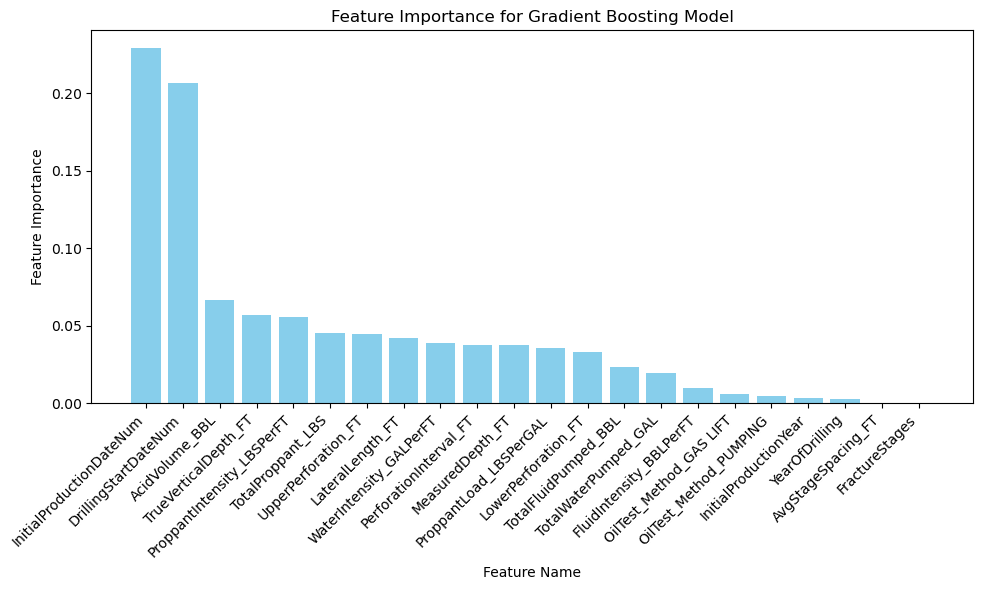

In [133]:
feature_names = X_train.columns
# Extract feature importances from the model
importances = gb_mod_5.feature_importances_
# Sort features and importances in descending order of importance
sorted_idx = importances.argsort()[::-1]
sorted_names = [feature_names[i] for i in sorted_idx]
sorted_importances = importances[sorted_idx]

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.bar(sorted_names, sorted_importances, color='skyblue')
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Gradient Boosting Model')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for better readability
plt.tight_layout()
plt.show()

In [149]:
from sklearn.tree import plot_tree

# Choose the tree index to visualize (between 0 and number of trees - 1)
tree_index = 4  # Change this to the desired tree index

# Extract the tree object from the model
tree = gb_mod_5.estimators_[tree_index]

In [151]:
from sklearn.tree import export_graphviz
export_graphviz(
        gb_mod_5,
        out_file="tree.dot",
        feature_names=X_train.columns,
        impurity=False,
        rounded=True,
        filled=True
    )
Source.from_file("tree.dot")

AttributeError: 'GradientBoostingRegressor' object has no attribute 'tree_'